<a href="https://colab.research.google.com/github/OviedoMarco/Mineria_de_datos/blob/DataSets/Visualizacion_Equipo09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 09

**Grupo: 002**

*Luis Adrian Navarro García 1866581*

*Marco Antonio Oviedo Acevedo 1851698*

*Nayelli Alondra Allende Gaona 1860995*

*Eliud Moreno Narvaez 1863955*

# **Credit Card Fraud Detection**

https://www.kaggle.com/mlg-ulb/creditcardfraud

## Carga del Dataset y Librerias

Importamos la libreria de **google.colab** para poder manipular nuestra base de datos que guardamos en nuestro drive

In [1]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


Leemos nuestra base de datos con la libreria pandas

In [2]:
import pandas as pd
pd.read_csv('/gdrive/MyDrive/creditcard.csv')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Es momento de cargar las librerias que se usaremos en este notebook para poder tratar los datos; de igual asiganeremos un nombre a nuestro dataframe.

In [3]:
# cargamos librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# Desactivar las advertencias para el cuaderno final
import warnings
warnings.filterwarnings('ignore')

# Carga de nuestro dataframe
df = pd.read_csv('/gdrive/MyDrive/creditcard.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observamos que nuestra base de datos cuenta con 284806 filas y 31 variables de las cuales:


*   **30 variables son flotantes**
*   **1 variable es entero**



## Limpieza de Datos.

Para empezar con la limpieza de datos, veamos los primeros datos de nuestro dataframe para darnos una idea de como vamos a manipular nuestros datos.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vemos que por el momento no es conveniente eliminar ninguna columna pues aun no sabemos que información sera relevante para nuestro analisis

Veamos si estamos tratando con datos nulos y si es asi veamos en donde se encuentran y cuantas son para poder tratarlas

In [5]:
plt.style.use('bmh')
# valores nulos
df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

## I. Estadisticas Basicas.

Analizemos el comportamiento de nuestras variables obteniendo:



*   Total de datos
*   Promedio
*   Desviación Estandar
*   Minimos, Maximos y Cuartiles



In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Un dato curioso es cuando vemos que el promdio del monto de las transacciones es de tan solo $88

*   Asimetria Postiva
*   Altamente leptocurtica



Obtenemos la asimetria y curtosis de las variables numericas

In [6]:
variables_numericas = df.dtypes[df.dtypes != "object"].index

In [11]:
for col in variables_numericas:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

Time            Skewness: -0.04     Kurtosis: -01.29
V1              Skewness: -3.28     Kurtosis: 032.49
V2              Skewness: -4.62     Kurtosis: 095.77
V3              Skewness: -2.24     Kurtosis: 026.62
V4              Skewness: 00.68     Kurtosis: 002.64
V5              Skewness: -2.43     Kurtosis: 206.90
V6              Skewness: 01.83     Kurtosis: 042.64
V7              Skewness: 02.55     Kurtosis: 405.61
V8              Skewness: -8.52     Kurtosis: 220.59
V9              Skewness: 00.55     Kurtosis: 003.73
V10             Skewness: 01.19     Kurtosis: 031.99
V11             Skewness: 00.36     Kurtosis: 001.63
V12             Skewness: -2.28     Kurtosis: 020.24
V13             Skewness: 00.07     Kurtosis: 000.20
V14             Skewness: -2.00     Kurtosis: 023.88
V15             Skewness: -0.31     Kurtosis: 000.28
V16             Skewness: -1.10     Kurtosis: 010.42
V17             Skewness: -3.84     Kurtosis: 094.80
V18             Skewness: -0.26     Kurtosis: 

*   Tiempo es platicurtica



## II. Graficas.

### Grafica de barras y datos agrupados

Empezamos a realizar una grafica de barras categorizando el total de transacciones fraudulentas y no fraudulentas

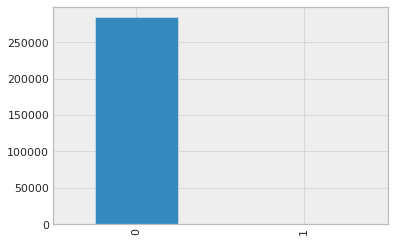

In [12]:
df['Class'].value_counts().plot.bar()

Observamos algo interesante, son tan pocas las transacciones fraudulentas que no podemos distingir la barra de fraude (0)

Para este paso aun no podremos realizar más graficas de barras para segmentar los datos pues nuestra base aun no esta preparada para ese paso

Contamos con tan solo variables numericas entonces tendremos que usar metodos de clustering para poder categorizar nuestras variables

### Grafica de lineas.

Debido a que tenemos demasiados datos podemos observar que casi no podemos distinguir un comportamineto como tal en nuestros datos

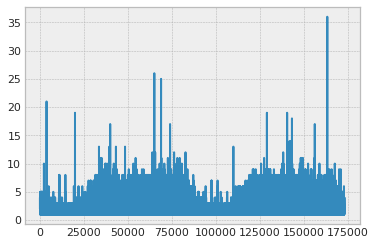

In [17]:
df['Time'].value_counts().sort_index().plot.line()

Para mejorar esto usaremos un grafico de frecuencia y lineas

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


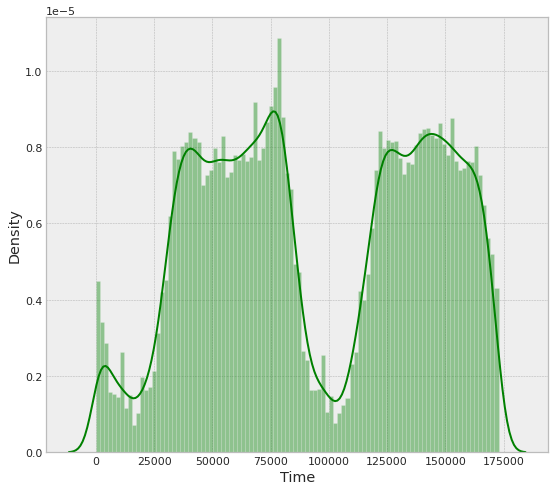

In [11]:
print(df['Time'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Time'], color='g', bins=100, hist_kws={'alpha': 0.4});

Realizamos un grafico de area

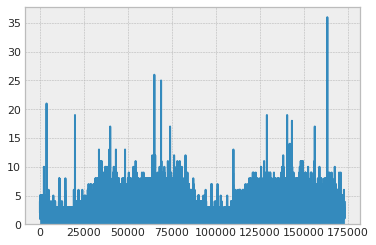

In [19]:
df['Time'].value_counts().sort_index().plot.area()

Apreciamos que tenemos datos muy dispersos y muchos outliers

### Histogramas

Ahora, para trabajar con datos en intervalos, las graficas de lineas trabajan bien. Las graficas de barras no, porque los datos de intervalo tienden a variar mucho.

Para esto usaremos los histogramas

Haremos histrogramas para cada una de nuestras variables

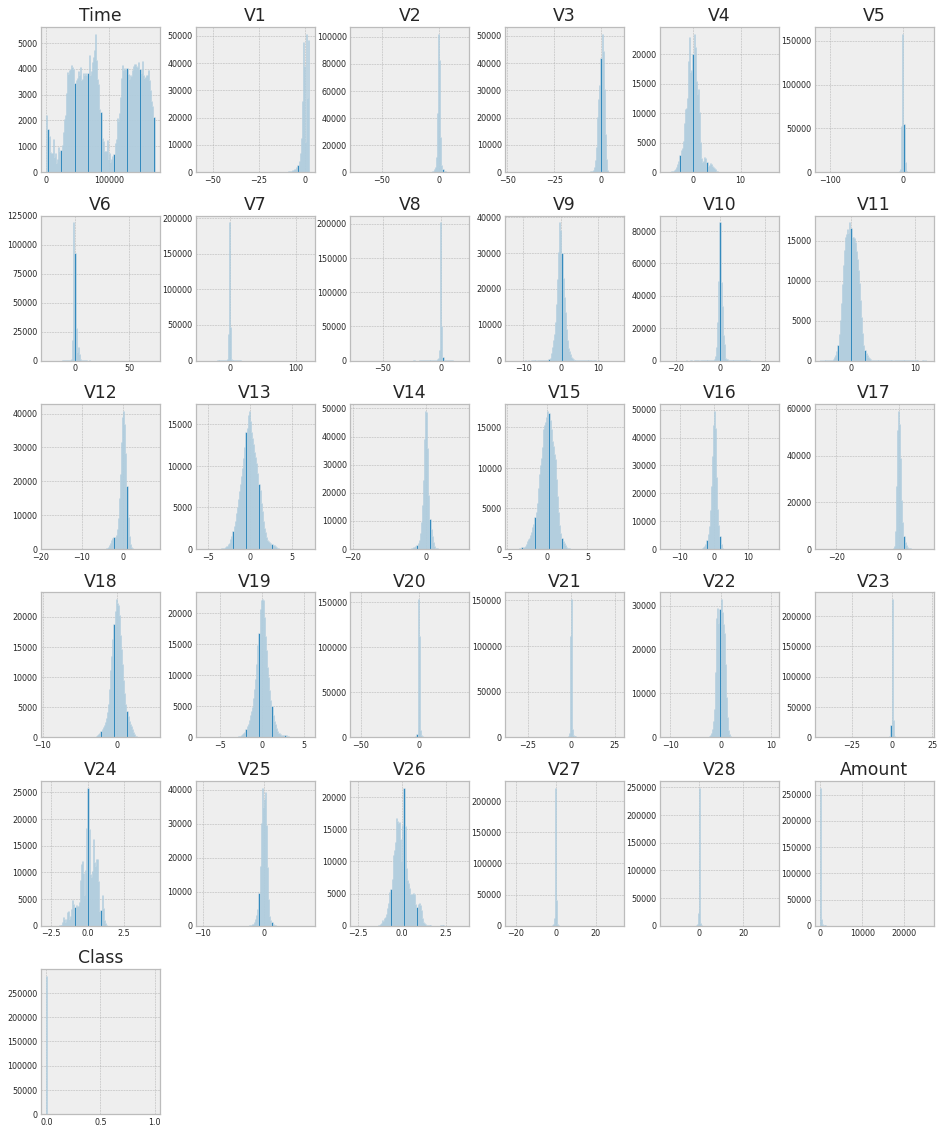

In [12]:
df.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8); 

Vemos como muchos picos en nuestros graficos, aqui podemos visualizar un poco nuestros datos para observar que variables tienen una distribucin normal y con cuales tenemos que trabajar para realizar RL 

## graficar datos bi-variantes

### Scatter plot

La grafica bi variante mas sencilla es la del scatter plot. Un scatter plot simple hace un mapa de cada variable de interes en un espacio bi dimensional.

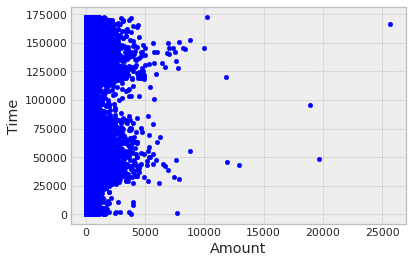

In [14]:
df[df['Amount'] < 30000].plot.scatter(x='Amount', y='Time')

Estra grafica muestra que el monto y el tiempo estan medianamente relacionados; todos los puntos se concentrar en cierto intervalo del monto

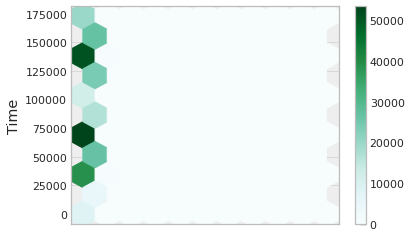

In [15]:
df[df['Amount'] < 30000].plot.hexbin(x='Amount', y='Time', gridsize=10)

Los datos en esta grafica se pueden comparar directamente con los resultados del scatter plot. Lo que nos dice en esta grafica es bastante diferente. Aqui podemos ver que se hace un pequeño cluster de monto, cosa que no podiamos deducir viendo la grafica del scatter plot porque para evitar el overploting se quitan los datos que son muy similares en precio o tiempo.

Este tipo de graficas tanto como el scatter plot pueden ser usadas para intervalos de variables y variables ordinales categoricas

In [ ]:
corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(variables_numericas)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

### Stacked plots

No se puede realizar graficos ampilados por el momento debido a la misma explicación que anteriormente se mencion.

Solo contamos con variables numericas y necesitaremos metodos de clustering para poder realizar este tipo de graficos

In [16]:
import seaborn as sns

KDE son las iniciales de Kernel Density Estimate. Es una tecnica estadística para quitar el ruido dentro de los datos. Toma en cuenta una de las debilidades mas importantes de una grafica de lineas, puliendo los outliers o valores que estan de por medio lo que causa que la linea se mueva de manera repentina.

Las graficas KDE tienen la característica de dar la forma más fiel a datos que forman intervalos. Sin embargo, no es recomendada por datos categoricos ordinales. Las graficas de KDE tambien pueden ser usadas en dos dimensiones, como se muestra en la grafica de abajo.

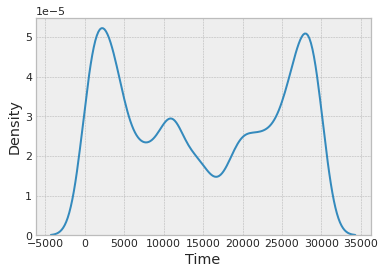

In [20]:
sns.kdeplot(df.query('Time < 30000').Time)

Vemos una linea más limpia pero sigue siendo poco constante

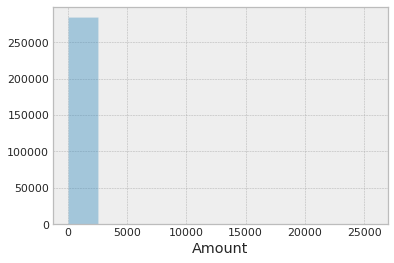

In [28]:
sns.distplot(df['Amount'], bins=10, kde=False)

Ahora tenemos los jointplots, que son como los scatter plots o los hexplots (graficas de coeficientes de correlacion), pero que muestran tambien histogramas de los datos en cada axis de la grafica

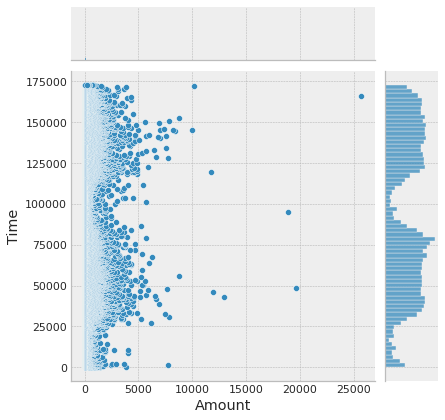

In [29]:
sns.jointplot(x='Amount', y='Time', data=df[df['Amount'] < 35000])

Aqui podemos tener una misma conclusion, existen datos que su comportamiento es muy similar y demasiado concentrado

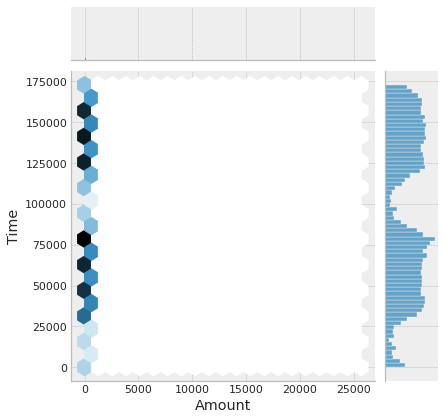

In [30]:
sns.jointplot(x='Amount', y='Time', data=df[df['Amount'] < 35000], kind='hex', 
              gridsize=20)

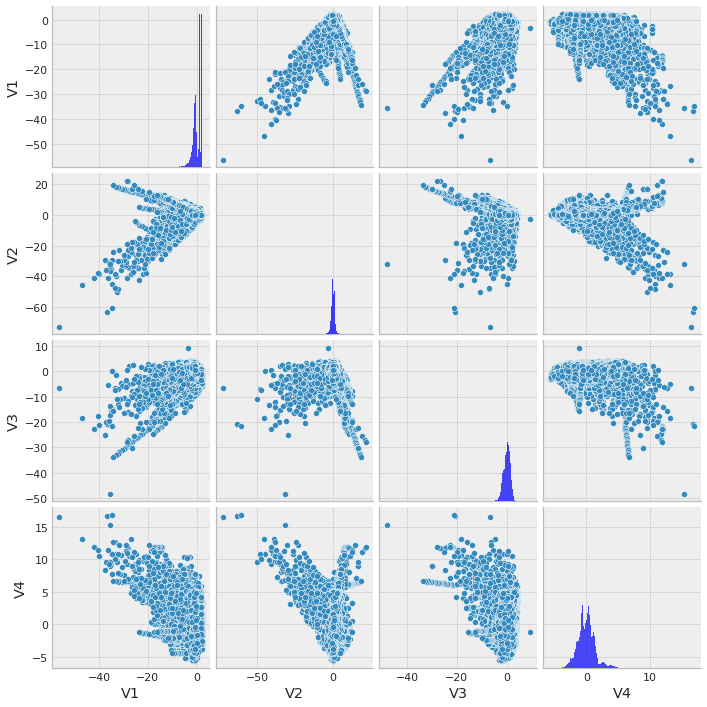

In [21]:
sns.pairplot(df[['V1', 'V2', 'V3', 'V4']])

Boxplot

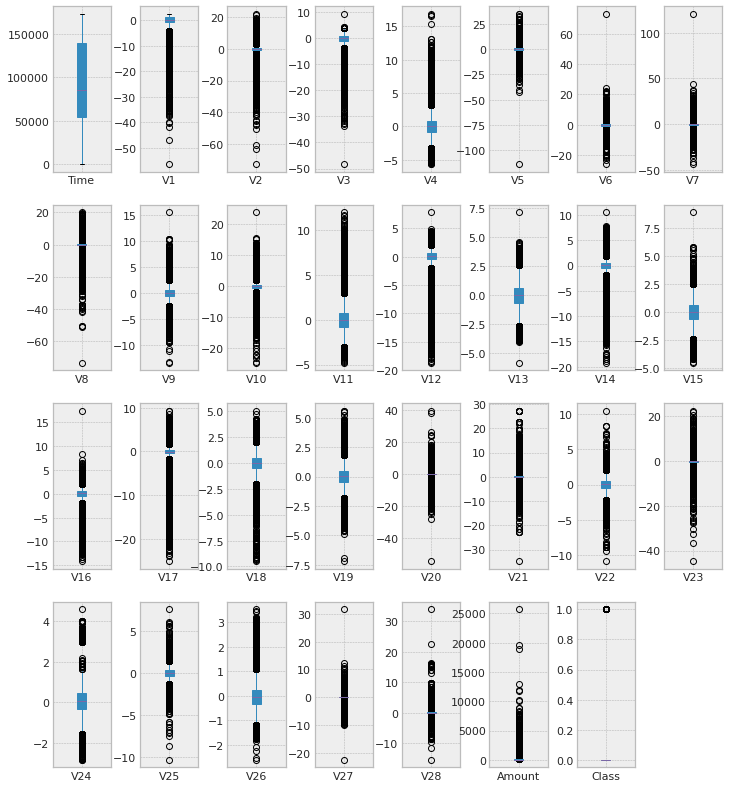

In [31]:
df_to_plot = df.drop(columns=[]).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(4,8), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

### Matriz de Correlacion

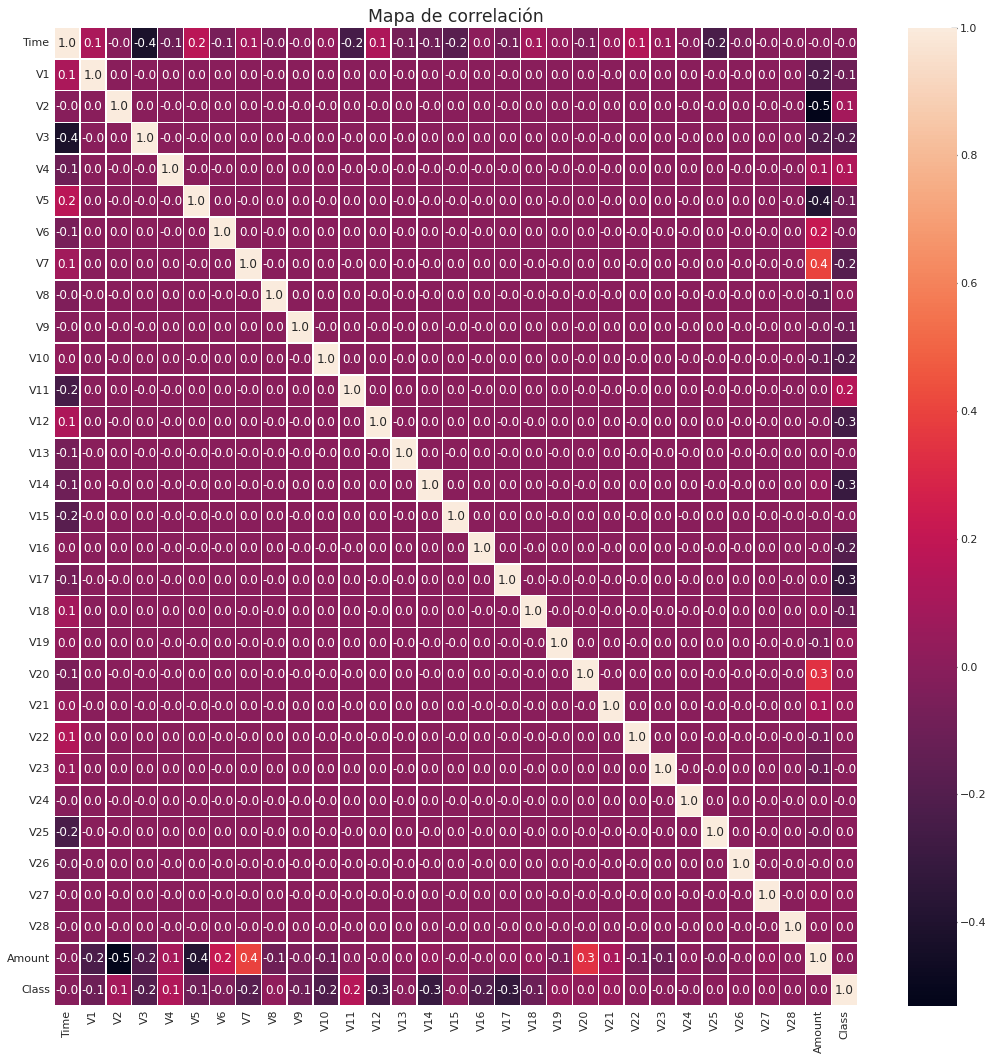

In [32]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()



*   Alta correlacion entre el monto y V7
*   Las variables mas correlacionadas con la variable de class es V7,V10,V12,V14,V17



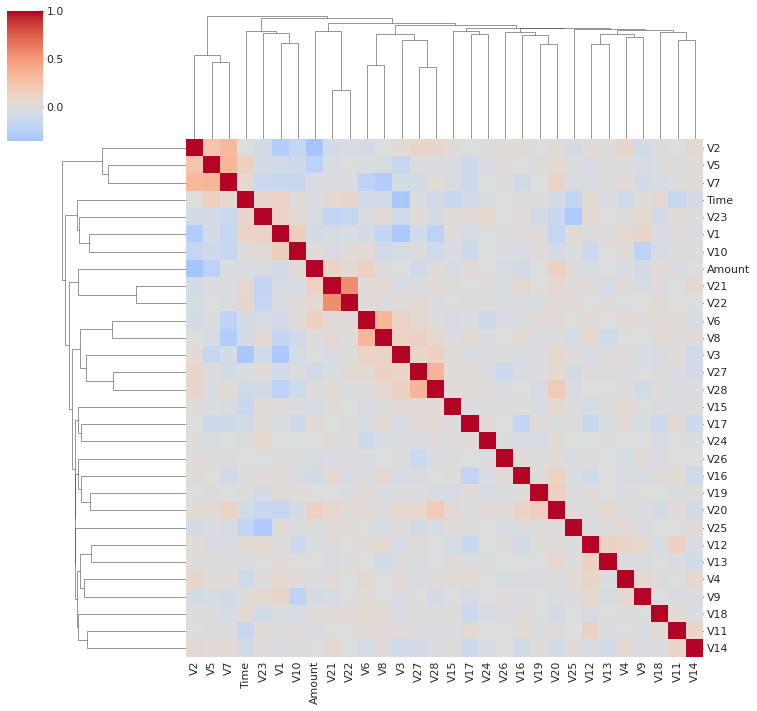

In [7]:
corrs = df.drop(columns='Class').select_dtypes(include=np.number).corr(method = 'kendall')
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

---

# The Worlds Biggest Public Companies

https://www.kaggle.com/berkayalan/the-worlds-biggest-companies-2021

## Carga del Dataset y Librerias

Importamos la libreria de **google.colab** para poder manipular nuestra base de datos que guardamos en nuestro drive

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


Leemos nuestra base de datos con la libreria pandas

In [3]:
import pandas as pd
pd.read_csv('/gdrive/MyDrive/The Worlds Biggest Public Companies.csv', delimiter=';')

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"
...,...,...,...,...,...,...,...
495,496,CSL,Australia,$9.9 B,$2.6 B,$17.7 B,$94.7 B
496,497,Safran,France,$19 B,$401.3 M,$48.4 B,$66.8 B
497,498,Banorte,Mexico,$9.4 B,$1.4 B,$89.7 B,$17.6 B
498,498,KeyCorp,United States,$7.3 B,$1.3 B,$170.3 B,$20 B


Es momento de cargar las librerias que se usaremos en este notebook para poder tratar los datos; de igual asiganeremos un nombre a nuestro dataframe.

In [5]:
# cargamos librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# Desactivar las advertencias para el cuaderno final
import warnings
warnings.filterwarnings('ignore')

# Carga de nuestro dataframe
df = pd.read_csv('/gdrive/MyDrive/The Worlds Biggest Public Companies.csv', delimiter=';')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          500 non-null    int64 
 1   Name          500 non-null    object
 2   Country       500 non-null    object
 3   Sales         500 non-null    object
 4   Profit        500 non-null    object
 5   Assets        500 non-null    object
 6   Market Value  500 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB
None


Observamos que nuestra base de datos cuenta con 284806 filas y 31 variables de las cuales:


*   **6 variables son Categoricas**
*   **1 variable es entero**



## Limpieza de Datos.

Para empezar con la limpieza de datos, veamos los primeros datos de nuestro dataframe para darnos una idea de como vamos a manipular nuestros datos.

In [11]:
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"


In [6]:
df.set_index('Rank', inplace=True)
df.head()

,Name,Country,Sales,Profit,Assets,Market Value
Rank,,,,,,
1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"


Vemos que tenemos 3 variables importantes que estamos perdiendo debido a que esta en formato de pesos, tenemos que transformar esos datos para no perderlos

Transformamos las variables Sales, Profit, Assets, Market Value en flotantes

In [7]:
def converter(x):
    converted = float(x[1:-2].replace(',', ''))
    if x.endswith('M'):
        converted /= 1000
    return converted

In [8]:
for col in df.columns[2:]:
    df[col] = df[col].apply(converter)

In [9]:
df.head()

,Name,Country,Sales,Profit,Assets,Market Value
Rank,,,,,,
1,ICBC,China,190.5,45.8,4914.7,249.5
2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
4,China Construction Bank,China,173.5,39.3,4301.7,210.4
5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2


De esta manera ya podremos hacer uso de esa informacion importante

Veamos si estamos tratando con datos nulos y si es asi veamos en donde se encuentran y cuantas son para poder tratarlas

In [10]:
plt.style.use('bmh')
# valores nulos
df.isnull().sum().sort_values(ascending=False)

Market Value    0
Assets          0
Profit          0
Sales           0
Country         0
Name            0
dtype: int64

Como no tenemos datos nulos podemos decir que nuestra base esta limpia y no necesitara metodos de transformacion o eliminacion de nulos

## I. Estadisticas Basicas.

Analizemos el comportamiento de nuestras variables obteniendo:



*   Total de datos
*   Promedio
*   Desviación Estandar
*   Minimos, Maximos y Cuartiles



In [11]:
df.describe()

,Sales,Profit,Assets,Market Value
count,500.000000,500.000000,500.000000,500.00000
mean,49.794600,4.173743,322.928000,104.80940
std,55.455785,7.457710,631.083439,208.07018
min,4.900000,-22.400000,14.800000,1.50000
25%,18.075000,1.400000,48.375000,28.95000
50%,31.400000,2.500000,109.200000,52.35000
75%,58.250000,4.725000,298.475000,104.10000
max,559.200000,63.900000,4914.700000,2252.30000


Contamos con las estadisticas basicas que podemos determinar que seran de importancia para el siguiente analisis

Obtenemos la asimetria y curtosis de las variables numericas

In [12]:
variables_numericas = df.dtypes[df.dtypes != "object"].index

In [13]:
for col in variables_numericas:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )

Sales           Skewness: 03.51     Kurtosis: 019.53
Profit          Skewness: 03.43     Kurtosis: 020.46
Assets          Skewness: 04.12     Kurtosis: 019.52
Market Value    Skewness: 06.91     Kurtosis: 057.08


Vemos que no contamos con distribuciones normales debido que no encontramos ninguna simetria en nuestros datos


### Grafica de barras y datos agrupados

Empezamos a realizar una grafica de barras categorizando el total del nombre de las instituciones

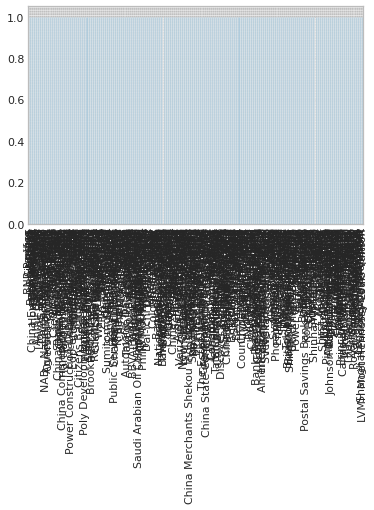

In [14]:
df['Name'].value_counts().plot.bar()

Como contamos con muchas instituciones no es conveniente formalizar este grafico pues no porporciona mucha información y puede ensuciar nuestro informe

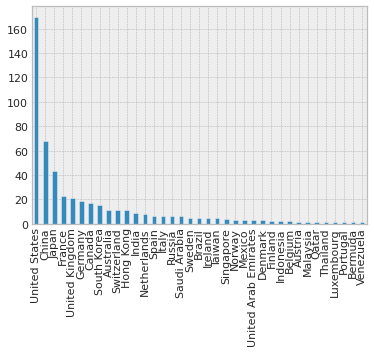

In [15]:
df['Country'].value_counts().plot.bar()

En este paso contamos el total por cada Pais estando en la cabeza de esto Estados Unidos

### Grafica de lineas.

Debido a que tenemos demasiados datos podemos observar que casi no podemos distinguir un comportamineto como tal en nuestros datos

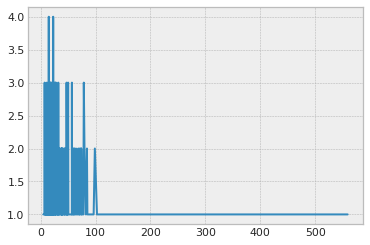

In [16]:
df['Sales'].value_counts().sort_index().plot.line()

Para mejorar esto usaremos un grafico de frecuencia y lineas

count    500.000000
mean      49.794600
std       55.455785
min        4.900000
25%       18.075000
50%       31.400000
75%       58.250000
max      559.200000
Name: Sales, dtype: float64


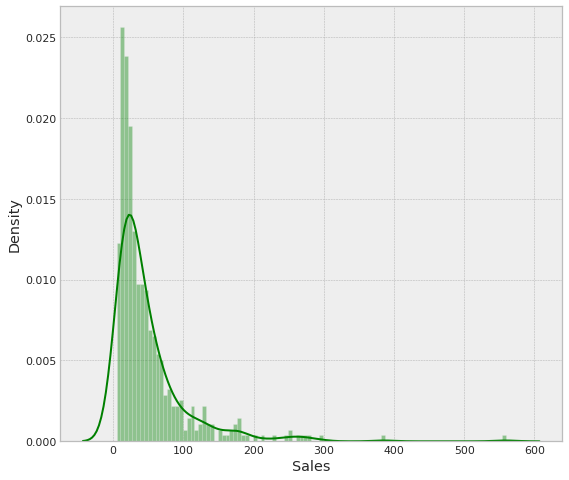

In [17]:
print(df['Sales'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Sales'], color='g', bins=100, hist_kws={'alpha': 0.4});

Con el grafico anterior podemos darnos cuenta que tenemos valores que salen de lo normal y tenemos que realizar puntos de corte

Realizamos un grafico de area

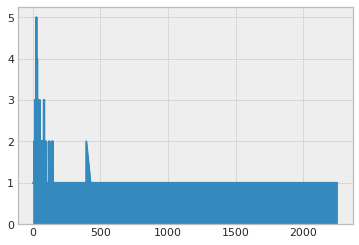

In [18]:
df['Market Value'].value_counts().sort_index().plot.area()

Aqui vemos la poca constancia que se tien en los datos y como provoca que esta no tenga forma que proporcione mucha informacion

### Histogramas

Ahora, para trabajar con datos en intervalos, las graficas de lineas trabajan bien. Las graficas de barras no, porque los datos de intervalo tienden a variar mucho.

Para esto usaremos los histogramas

Haremos histrogramas para cada una de nuestras variables

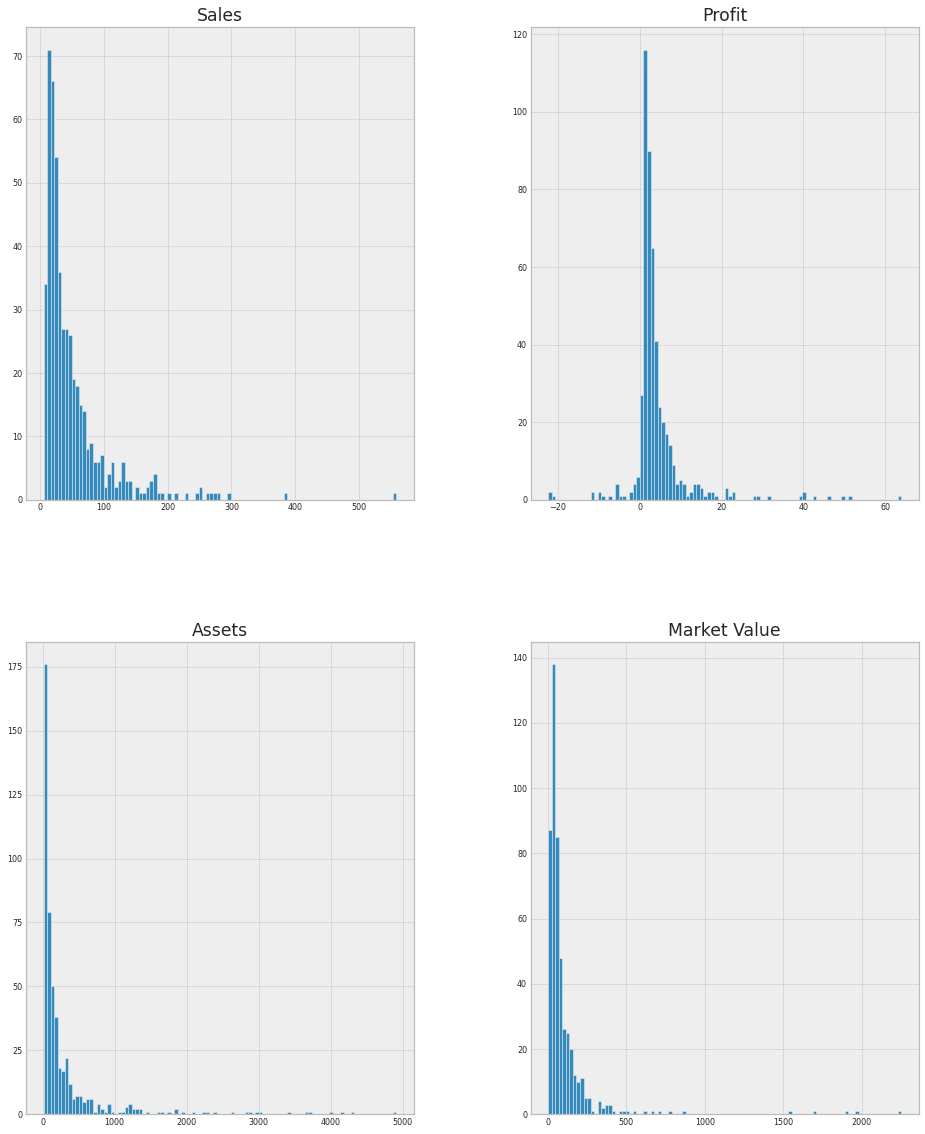

In [19]:
df.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8); 

Vemos como muchos picos en nuestros graficos, aqui podemos visualizar un poco nuestros datos para observar que variables Profit es la unica que se comporta mas parecido a una distribucion normal, esto nos ayudara en algunos modelos de prediccion

## graficar datos bi-variantes

### Scatter plot

La grafica bi variante mas sencilla es la del scatter plot. Un scatter plot simple hace un mapa de cada variable de interes en un espacio bi dimensional.

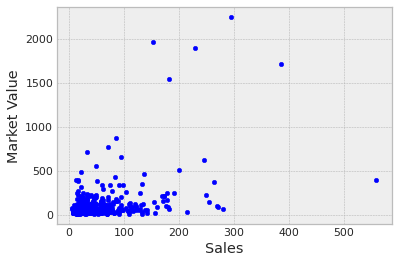

In [20]:
df[df['Sales'] < 30000].plot.scatter(x='Sales', y='Market Value')

Vemos un comportamiento conjunto en el cual encontramos algunos puntos muy fuera del rango normal

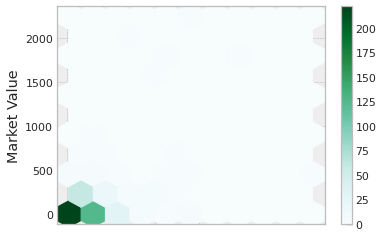

In [21]:
df[df['Sales'] < 30000].plot.hexbin(x='Sales', y='Market Value', gridsize=10)

Los datos en esta grafica se pueden comparar directamente con los resultados del scatter plot. Lo que nos dice en esta grafica es bastante diferente. Aqui podemos ver que se hace un pequeño cluster de monto, cosa que no podiamos deducir viendo la grafica del scatter plot porque para evitar el overploting se quitan los datos que son muy similares en precio o tiempo.

Este tipo de graficas tanto como el scatter plot pueden ser usadas para intervalos de variables y variables ordinales categoricas

Nota: nos realizo un cluster cuando market value es de 250

### Stacked plots

In [22]:
import seaborn as sns

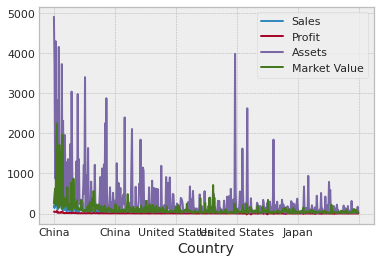

In [24]:
df.plot.line("Country")

Aqui realizamos un grafica ampilada y aunque los datos se vean todos juntos podemos determinar que el que tiene mas activos y ventas es China

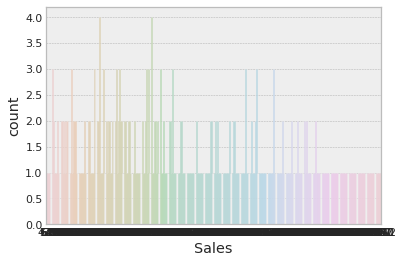

In [25]:
sns.countplot(df['Sales'])

Vemos una linea más limpia pero sigue siendo poco constante

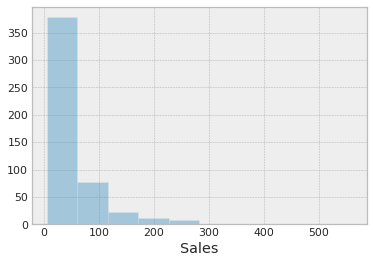

In [27]:
sns.distplot(df['Sales'], bins=10, kde=False)

Ahora tenemos los jointplots, que son como los scatter plots o los hexplots (graficas de coeficientes de correlacion), pero que muestran tambien histogramas de los datos en cada axis de la grafica

Aqui podemos tener una misma conclusion, existen datos que su comportamiento es muy similar y demasiado concentrado

Boxplot

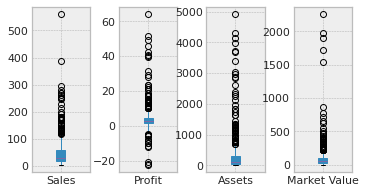

In [36]:
df_to_plot = df.drop(columns=[]).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(4,8), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Al realizar los boxplot podemos observar que tenemos muchos valores atipicos que tendremos que trabajar mas adelante para poder usar modelos de prediccion y analisis

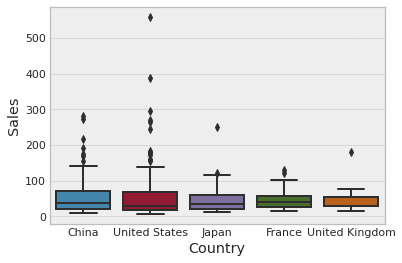

In [41]:
df2 = df[df.Country.isin(df.Country.value_counts().head(5).index)]

sns.boxplot(
    x='Country',
    y='Sales',
    data=df2
)

aqui vemos que el pais que tiene mayor valores atipicos es estados unidos pues ha tenido destellos en sus ventas pero no es constante

### Matriz de Correlacion

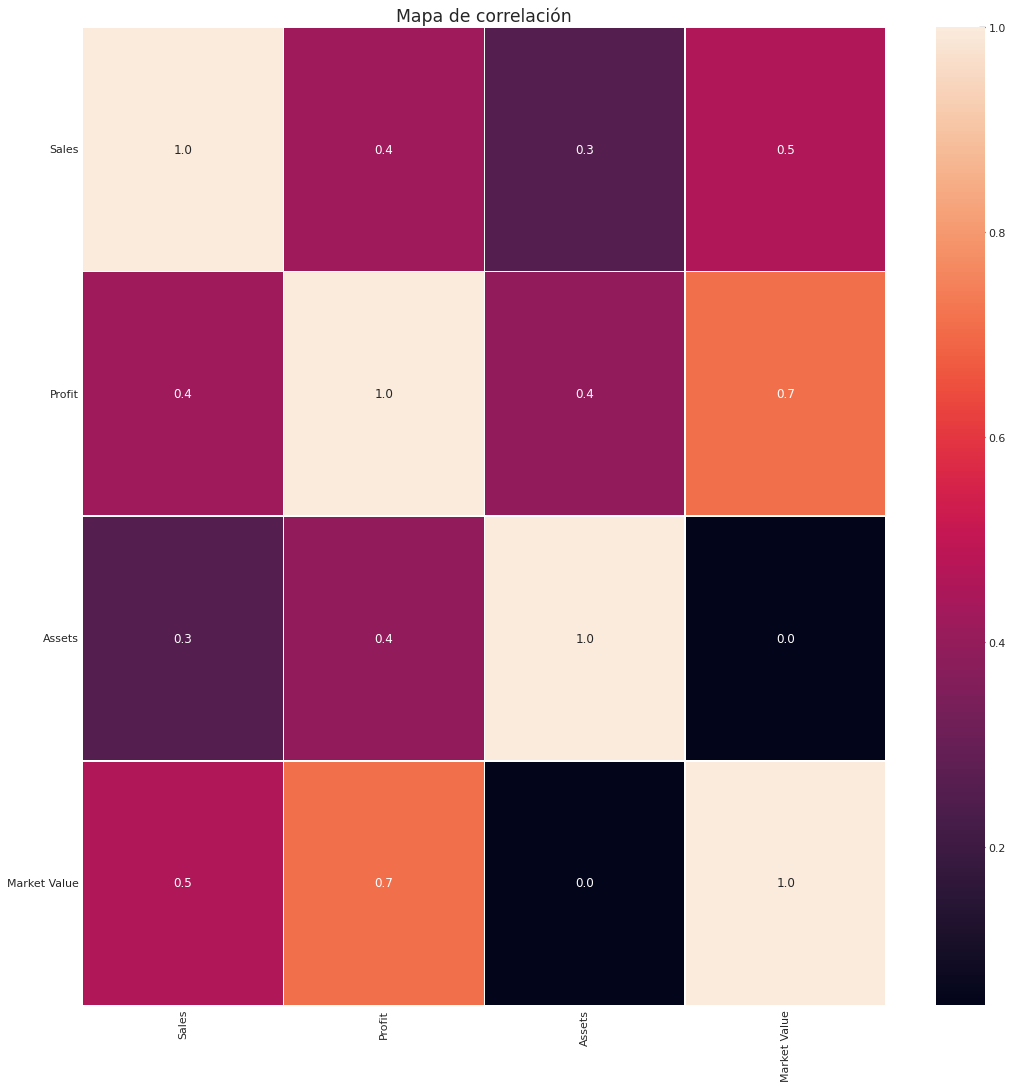

In [37]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()


Podemos determinar que todas la variables estan correlacionadas excepto Assets y Market Value



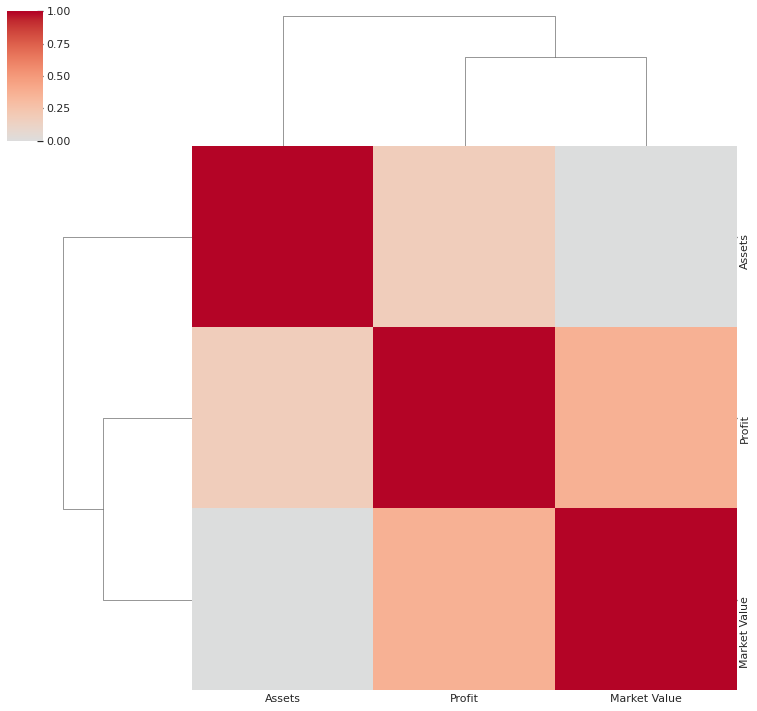

In [38]:
corrs = df.drop(columns='Sales').select_dtypes(include=np.number).corr(method = 'kendall')
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);